# Automatic Google search of venue images

In [0]:
CITY = 'LAS VEGAS'

In [1]:
!pip install google_images_download

     |████████████████████████████████| 911kB 43.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=615fea0fd5794fb6dec341c77dd4807c518b8de83e8cda10847f5daddf7c897a
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
import pandas as pd
import numpy as np
from google_images_download import google_images_download

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
from google.colab import files
uploaded = files.upload()

Saving predicthq_export - Las Vegas - Ralph Lauren.csv to predicthq_export - Las Vegas - Ralph Lauren.csv


In [0]:
events = pd.read_csv("predicthq_export - Las Vegas - Ralph Lauren.csv")

In [8]:
events.head(5)

,id,title,description,start,end,predicted_end,duration,labels,category,timezone,country,location,venue_name,venue_formatted_address,scope,rank,local_rank,aviation_rank,state,first_seen
0,QMkyB7YCXgZQqsWB8e,Seventh-day Adventist Attorneys' Conference & ...,"""Keynote Speaker: Judge James E. Graves, Jr., ...",2016-07-27T22:00:00Z,2016-10-23T19:00:00Z,NaN,7592400,"""community,education""",community,America/Los_Angeles,US,"""36.10212,-114.932817""",Spa Ravella at Hilton Lake Las Vegas,"1610 Lake Las Vegas Parkway\nHenderson, NV 890...",locality,21,54.0,NaN,active,2017-12-26T08:03:43Z
1,nvABpR9LXwwk,West Excellence: WRBLSA Academic Retreat,"""We cordially invite you to participate in the...",2016-10-07T15:00:00Z,2016-10-09T03:00:00Z,NaN,129600,"""conference,education,family""",conferences,America/Los_Angeles,US,"""36.106732,-115.143628""",NaN,NaN,locality,37,52.0,0.0,active,2016-09-04T00:02:42Z
2,PlVJdqVPJzXm,Life Benefits Wealth Summit 2016,"""About The Wealth SummitThis Wealth Summit is ...",2016-10-07T15:00:00Z,2016-10-09T21:00:00Z,NaN,194400,"""business,conference""",conferences,America/Los_Angeles,US,"""36.020702,-115.089629""",Green Valley Ranch Resort Spa & Casino,"2300 Paseo Verde Parkway\nHenderson, NV 89052\...",locality,42,63.0,0.0,active,2016-08-03T03:38:16Z
3,1KA12OQWR3pl,TIA Technical Conference,NaN,2016-10-07T16:00:00Z,2016-10-09T01:00:00Z,NaN,118800,"""conference,education""",conferences,America/Los_Angeles,US,"""36.130707,-115.151831""",Las Vegas Convention Center,"3150 Paradise Road\nLas Vegas, NV 89109\nUnite...",locality,44,58.0,0.0,active,2017-07-28T00:53:30Z
4,TA5fR5zPt5VCF6H3JY,International Baking Industry Exposition,NaN,2016-10-08T07:00:00Z,2016-10-12T06:59:59Z,NaN,345599,"""expo,food""",expos,America/Los_Angeles,US,"""36.131324,-115.150362""",NaN,NaN,locality,77,92.0,76.0,active,2019-09-11T23:20:23Z


In [9]:
events.shape

(99076, 20)

In [10]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99076 entries, 0 to 99075
Data columns (total 20 columns):
id                         99076 non-null object
title                      99076 non-null object
description                30641 non-null object
start                      99076 non-null object
end                        99076 non-null object
predicted_end              730 non-null object
duration                   99076 non-null int64
labels                     99076 non-null object
category                   99076 non-null object
timezone                   98106 non-null object
country                    99076 non-null object
location                   99076 non-null object
venue_name                 91581 non-null object
venue_formatted_address    90328 non-null object
scope                      99076 non-null object
rank                       99076 non-null int64
local_rank                 97422 non-null float64
aviation_rank              44424 non-null float64
state      

In [11]:
events['venue_id'] = events.groupby('venue_name').ngroup()
events.head(2)

,id,title,description,start,end,predicted_end,duration,labels,category,timezone,country,location,venue_name,venue_formatted_address,scope,rank,local_rank,aviation_rank,state,first_seen,venue_id
0,QMkyB7YCXgZQqsWB8e,Seventh-day Adventist Attorneys' Conference & ...,"""Keynote Speaker: Judge James E. Graves, Jr., ...",2016-07-27T22:00:00Z,2016-10-23T19:00:00Z,NaN,7592400,"""community,education""",community,America/Los_Angeles,US,"""36.10212,-114.932817""",Spa Ravella at Hilton Lake Las Vegas,"1610 Lake Las Vegas Parkway\nHenderson, NV 890...",locality,21,54.0,NaN,active,2017-12-26T08:03:43Z,944
1,nvABpR9LXwwk,West Excellence: WRBLSA Academic Retreat,"""We cordially invite you to participate in the...",2016-10-07T15:00:00Z,2016-10-09T03:00:00Z,NaN,129600,"""conference,education,family""",conferences,America/Los_Angeles,US,"""36.106732,-115.143628""",NaN,NaN,locality,37,52.0,0.0,active,2016-09-04T00:02:42Z,-1


In [12]:
events.venue_id.nunique()

1268

In [0]:
venue = pd.DataFrame(events[['venue_name', 'venue_id']].drop_duplicates(['venue_id']).dropna())
venue['venue_type'] = ''

In [14]:
len(venue)

1267

In [15]:
venue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 0 to 99006
Data columns (total 3 columns):
venue_name    1267 non-null object
venue_id      1267 non-null int64
venue_type    1267 non-null object
dtypes: int64(1), object(2)
memory usage: 39.6+ KB


In [16]:
venue[venue['venue_name'].str.contains(',')]

,venue_name,venue_id,venue_type
43,"Viva ELVIS Theater, Aria at CityCenter",1146,
67,"South Point Hotel, Casino & Spa",939,
161,"Crown Theater and Nightclub, Rio",243,
5496,"bounty hunter 415 East Windmill Lane, Las Vegas",1263,
8082,"The Westin Las Vegas Hotel, Casino & Spa",1075,
13916,"University of Nevada, Las Vegas (UNLV)",1122,
14703,"University of Nevada, Las Vegas: Alta Ham Fine...",1124,
20167,"Congo Room, The",213,
20766,"University of Nevada, Las Vegas",1121,
22873,"SLS Las Vegas, a Tribute Portfolio Resort",894,


In [0]:
# events.to_csv('venue.csv', columns=['venue_name'], index=False)
# Replace ',' with ' ' for search by keywords, which requires separation
# of keywords by ','
venue['new_venue_name'] = venue['venue_name'].str.replace(',', ' ')
venue_name = venue['new_venue_name'].str.cat(sep=',')

In [18]:
venue.head(3)

,venue_name,venue_id,venue_type,new_venue_name
0,Spa Ravella at Hilton Lake Las Vegas,944,,Spa Ravella at Hilton Lake Las Vegas
2,Green Valley Ranch Resort Spa & Casino,396,,Green Valley Ranch Resort Spa & Casino
3,Las Vegas Convention Center,614,,Las Vegas Convention Center


In [19]:
len(venue_name.split(','))

1267

In [0]:
import pathlib
import shutil
import os

# Remove directories if exist
image_dir = pathlib.Path('/content/downloads')
if os.path.isdir(image_dir):
  shutil.rmtree(image_dir)

In [21]:
# Class instantiation
response = google_images_download.googleimagesdownload()   

# Create dictionary of arguments
arguments = {"keywords":venue_name, 
            #  "usage_rights":"labeled-for-reuse-with-modifications",
             "limit":1,
             "format":"jpg",
             "color_type":"full-color",
             "type":"photo",
             "size":"medium",
             "silent_mode":True
             }   
paths = response.download(arguments)  

# Places365-CNN for classifying venue images

In [22]:
!pip install Pillow

In [0]:
# https://github.com/CSAILVision/places365/blob/master/run_placesCNN_unified.py
# Demo: http://places2.csail.mit.edu/demo.html
# PlacesCNN to predict the scene category, attribute, and 
# class activation map in a single pass
# by Bolei Zhou, sep 2, 2017

import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
import numpy as np
# from scipy.misc import imresize as imresize
import cv2
from PIL import Image


def load_labels():
    # prepare all the labels
    # scene category relevant
    file_name_category = 'categories_places365.txt'
    if not os.access(file_name_category, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
        os.system('wget ' + synset_url)
    classes = list()
    with open(file_name_category) as class_file:
        for line in class_file:
            classes.append(line.strip().split(' ')[0][3:])
    classes = tuple(classes)

    # indoor and outdoor relevant
    file_name_IO = 'IO_places365.txt'
    if not os.access(file_name_IO, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/IO_places365.txt'
        os.system('wget ' + synset_url)
    with open(file_name_IO) as f:
        lines = f.readlines()
        labels_IO = []
        for line in lines:
            items = line.rstrip().split()
            labels_IO.append(int(items[-1]) -1) # 0 is indoor, 1 is outdoor
    labels_IO = np.array(labels_IO)

    # scene attribute relevant
    file_name_attribute = 'labels_sunattribute.txt'
    if not os.access(file_name_attribute, os.W_OK):
        synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/labels_sunattribute.txt'
        os.system('wget ' + synset_url)
    with open(file_name_attribute) as f:
        lines = f.readlines()
        labels_attribute = [item.rstrip() for item in lines]
    file_name_W = 'W_sceneattribute_wideresnet18.npy'
    if not os.access(file_name_W, os.W_OK):
        synset_url = 'http://places2.csail.mit.edu/models_places365/W_sceneattribute_wideresnet18.npy'
        os.system('wget ' + synset_url)
    W_attribute = np.load(file_name_W)

    return classes, labels_IO, labels_attribute, W_attribute

def hook_feature(module, input, output):
    features_blobs.append(np.squeeze(output.data.cpu().numpy()))

# def returnCAM(feature_conv, weight_softmax, class_idx):
#     # generate the class activation maps upsample to 256x256
#     size_upsample = (256, 256)
#     nc, h, w = feature_conv.shape
#     output_cam = []
#     for idx in class_idx:
#         cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
#         cam = cam.reshape(h, w)
#         cam = cam - np.min(cam)
#         cam_img = cam / np.max(cam)
#         cam_img = np.uint8(255 * cam_img)
#         output_cam.append(imresize(cam_img, size_upsample))
#     return output_cam

def returnTF():
# load the image transformer
    tf = trn.Compose([
        trn.Resize((224,224)),
        trn.ToTensor(),
        trn.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return tf


def load_model():
    # this model has a last conv feature map as 14x14

    model_file = 'wideresnet18_places365.pth.tar'
    if not os.access(model_file, os.W_OK):
        os.system('wget http://places2.csail.mit.edu/models_places365/' + model_file)
        os.system('wget https://raw.githubusercontent.com/csailvision/places365/master/wideresnet.py')

    import wideresnet
    model = wideresnet.resnet18(num_classes=365)
    checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
    state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
    model.load_state_dict(state_dict)
    model.eval()



    # the following is deprecated, everything is migrated to python36

    ## if you encounter the UnicodeDecodeError when use python3 to load the model, add the following line will fix it. Thanks to @soravux
    #from functools import partial
    #import pickle
    #pickle.load = partial(pickle.load, encoding="latin1")
    #pickle.Unpickler = partial(pickle.Unpickler, encoding="latin1")
    #model = torch.load(model_file, map_location=lambda storage, loc: storage, pickle_module=pickle)

    model.eval()
    # hook the feature extractor
    features_names = ['layer4','avgpool'] # this is the last conv layer of the resnet
    for name in features_names:
        model._modules.get(name).register_forward_hook(hook_feature)
    return model

In [0]:
# load the labels
classes, labels_IO, labels_attribute, W_attribute = load_labels()

# load the model
features_blobs = []
model = load_model()

# load the transformer
tf = returnTF() # image transformer

# get the softmax weight
params = list(model.parameters())
weight_softmax = params[-2].data.numpy()
weight_softmax[weight_softmax<0] = 0

In [47]:
all_image_paths = list(image_dir.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths[:5]

['/content/downloads/International Day of Women and Girls in Science/1.Celebrating-International-Day-of-Women-and-Girls-in-Science_OPTIMIZED-870x484.jpg',
 '/content/downloads/National Family Medicine Board Review/1.hqdefault.jpg',
 "/content/downloads/Drai's Live/1.32012851.jpg",
 '/content/downloads/Redflint/1.web1_redflint-18_7537623.jpg',
 '/content/downloads/International Day to End Obstetric Fistula/1.featured-image-index-sm.jpg']

In [95]:
len(all_image_paths)
# Some venue images are unavailable.

1090

In [0]:
all_image_venues = list(image_dir.glob('*/*'))
all_image_venues = [str(path.parts[3]) for path in all_image_venues]

In [50]:
all_image_venues[:5]

['International Day of Women and Girls in Science',
 'National Family Medicine Board Review',
 "Drai's Live",
 'Redflint',
 'International Day to End Obstetric Fistula']

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image(all_image_paths=all_image_paths,
                  all_image_venues=all_image_venues):

  for i in range(5):
    img_path = all_image_paths[i]
    img = mpimg.imread(img_path)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()
  
    print(all_image_venues[i])

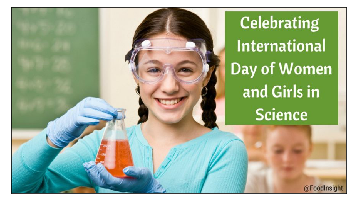

International Day of Women and Girls in Science


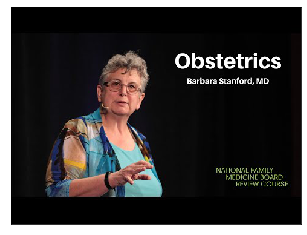

National Family Medicine Board Review


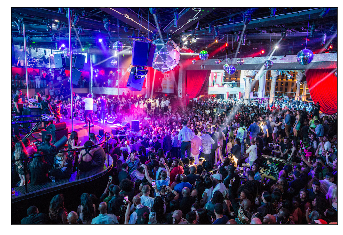

Drai's Live


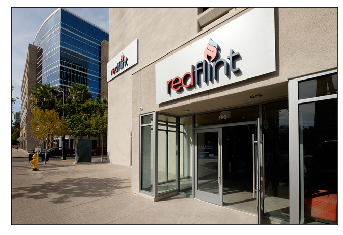

Redflint


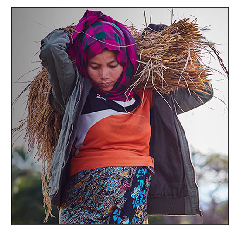

International Day to End Obstetric Fistula


In [52]:
display_image()

In [53]:
for i in range(len(all_image_paths)):
  # load the test image
  try:
    img = Image.open(all_image_paths[i])
    input_img = V(tf(img).unsqueeze(0))

    # forward pass
    logit = model.forward(input_img)
    h_x = F.softmax(logit, 1).data.squeeze()
    probs, idx = h_x.sort(0, True)
    probs = probs.numpy()
    idx = idx.numpy()

    # output the IO prediction
    io_image = np.mean(labels_IO[idx[:10]]) # vote for the indoor or outdoor
    if io_image < 0.5:
      venue.loc[venue.new_venue_name == all_image_venues[i], ['venue_type']] = 'indoor'
    else:
      venue.loc[venue.new_venue_name == all_image_venues[i], ['venue_type']] = 'outdoor'
      
  except Exception:
    print('Broken image', all_image_paths[i])

Broken image /content/downloads/World Autoimmune / Autoinflammatory Arthritis Day


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Broken image /content/downloads/World Habitat Day/1.world-habitat-day_31012.jpg
Broken image /content/downloads/National POW/MIA Recognition Day
Broken image /content/downloads/Official Metal District/1.717966.jpg
Broken image /content/downloads/EAR / OFAC Export Controls
Broken image /content/downloads/Tu Bishvat/Tu B'Shevat
Broken image /content/downloads/VFW Post 10047/1.12391873_1002005363190417_2283056170294629268_n.jpg
Broken image /content/downloads/Cardio/Pulmonary Medicine for Primary Care
Broken image /content/downloads/Shrove Tuesday/Mardi Gras
Broken image /content/downloads/Kid's Hub - Las Vegas/1.Las-Vegas.jpg
Broken image /content/downloads/Chanukah/Hanukkah (first day)
Broken image /content/downloads/Diwali/Deepavali
Broken image /content/downloads/Acres Underground / Cannabis Leadership Expo
Broken image /content/downloads/East Las Vegas Community/Senior Center
Broken image /content/downloads/Courtyard by Marriott Las Vegas Henderson/Green Valley


In [0]:
# Fill empty strings with nan
venue = venue.replace(r'^\s*$', np.nan, regex=True)

In [55]:
venue.head(10)

,venue_name,venue_id,venue_type,new_venue_name
0,Spa Ravella at Hilton Lake Las Vegas,944,indoor,Spa Ravella at Hilton Lake Las Vegas
2,Green Valley Ranch Resort Spa & Casino,396,outdoor,Green Valley Ranch Resort Spa & Casino
3,Las Vegas Convention Center,614,outdoor,Las Vegas Convention Center
7,Henderson Convention Center,430,outdoor,Henderson Convention Center
9,Night Owl Showroom,764,indoor,Night Owl Showroom
10,Leif Erikson Day,646,outdoor,Leif Erikson Day
11,Hooters Casino Hotel,447,outdoor,Hooters Casino Hotel
12,World Post Day,1225,outdoor,World Post Day
14,Hispanic Museum of Nevada,440,indoor,Hispanic Museum of Nevada
15,V Theater,1127,indoor,V Theater


In [56]:
venue[venue['venue_type'].isnull()]

,venue_name,venue_id,venue_type,new_venue_name
18,Flamingo Las Vegas,357,NaN,Flamingo Las Vegas
114,Money Plays,707,NaN,Money Plays
418,Scoundrels Pub,912,NaN,Scoundrels Pub
1059,Unitarian Universalist Congregation of Las Vegas,1112,NaN,Unitarian Universalist Congregation of Las Vegas
1151,The Colosseum,1018,NaN,The Colosseum
...,...,...,...,...
88893,Indoor Ag-Con,476,NaN,Indoor Ag-Con
89501,Swiss Watch By JCK,981,NaN,Swiss Watch By JCK
93824,Source Direct at ASD,937,NaN,Source Direct at ASD
94928,Kid's Hub - Las Vegas,593,NaN,Kid's Hub - Las Vegas


# Some NLPs to fill NA's / reclassify

## Top 150 tagging

In [0]:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# Flatten into a list
tokens = venue.apply(lambda x: nltk.word_tokenize(x['venue_name']), axis=1).sum()
tags = nltk.pos_tag(tokens)

In [0]:
nouns = [token[0] for token in tags if token[1] == 'NNP']
frequency = nltk.FreqDist(nouns)
top_150 = frequency.most_common(150)

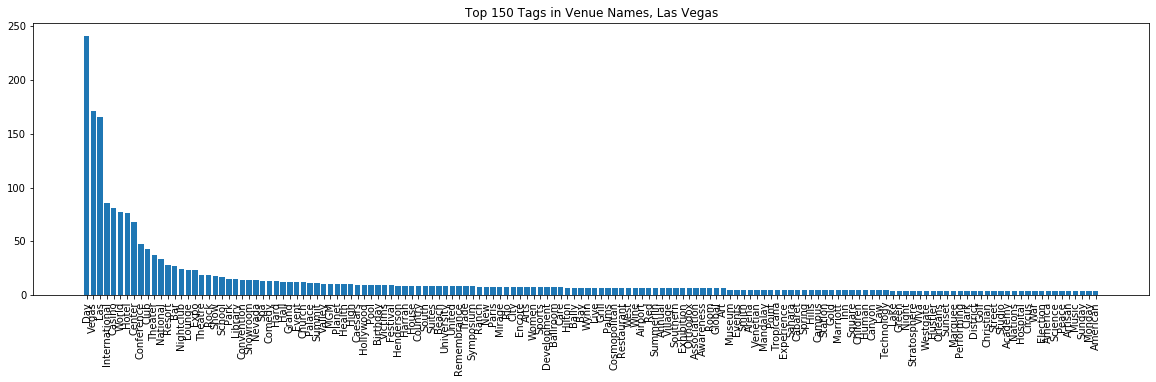

In [59]:
plt.figure(figsize=(20, 5))
plt.bar(range(len(top_150)), [val[1] for val in top_150], align='center')
plt.xticks(range(len(top_150)), [val[0] for val in top_150])
plt.xticks(rotation=90)
plt.title('Top 150 Tags in Venue Names, ' + CITY)
plt.savefig('Top 150 Tags in Venue Names, ' + CITY + '.jpg')
plt.show()

In [60]:
[val[0] for val in top_150]

['Day',
 'Vegas',
 'Las',
 'International',
 'Casino',
 'World',
 'Hotel',
 'Center',
 'Conference',
 'Club',
 'Theater',
 'National',
 'Resort',
 'Bar',
 'Nightclub',
 'Lounge',
 'Expo',
 'Theatre',
 'Rock',
 'Show',
 'School',
 'Park',
 'Library',
 'Convention',
 'Showroom',
 'Nevada',
 'Spa',
 'Comedy',
 'Hard',
 'Hall',
 'Grand',
 'Event',
 'Church',
 'Palace',
 'Summit',
 'Valley',
 'MGM',
 'Planet',
 'Health',
 'High',
 'Caesars',
 'Hollywood',
 'Pool',
 'Birthday',
 'Victims',
 'Festival',
 'Henderson',
 'Harrah',
 'House',
 'Country',
 'South',
 'Suites',
 'Beach',
 'University',
 'United',
 'Remembrance',
 'Trade',
 'Symposium',
 'Ranch',
 'New',
 'Paris',
 'Mirage',
 'Rio',
 'City',
 'Encore',
 'Arts',
 'Women',
 'Sports',
 'Development',
 'Ballroom',
 'Care',
 'Hilton',
 'Bally',
 'Bay',
 'Wynn',
 'Live',
 'Grill',
 'Palms',
 'Cosmopolitan',
 'Restaurant',
 'West',
 'Wine',
 'Airport',
 'Red',
 'Summerlin',
 'Annual',
 'Village',
 'Southern',
 'Exhibition',
 'Orthodox',
 'As

In [0]:
# Many clubs/hotels
indoor_word_list = ['Casino', 'Hotel', 'Center', 'Conference', 'Club', 'Theater', \
                    'Bar', 'Resort', 'NightClub', 'Lounge', 'Expo', 'Theatre', \
                    'School', 'Show', 'Library', 'Convention', 'Showroom', 'Spa', \
                    'Hall', 'Church', 'Palace', 'Summit', 'MGM', 'Caesars', 'Harrah', \
                    'House', 'Suites', 'University', 'Ballroom', 'Hilton', 'Bally', \
                    'Wynn', 'Restaurant', 'Airport', 'Exhibition', 'Room', 'Museum', \
                    'Arena', 'Campus', 'Station', 'Marriott', 'Inn', 'Square', \
                    'Stratosphere', 'Westgate', 'Orleans', 'Marquee', 'Studio', \
                    'Academy', 'Hospital', 'Circus']
outdoor_word_list = ['Park', 'Beach', 'Lake', 'Golf', 'Day']
# 'Rock', 'Pool', 'Canyon', 'Street'

In [0]:
import inflect
# Obtain the plurals for the words
engine = inflect.engine() # case-sensitive
indoor_word_list_pl = [engine.plural(w.lower()) for w in indoor_word_list]
outdoor_word_list_pl = [engine.plural(w.lower()) for w in outdoor_word_list]

In [0]:
# Case-insensitive
indoor_list = [s.lower() for s in indoor_word_list + indoor_word_list_pl]
outdoor_list = [s.lower() for s in outdoor_word_list + outdoor_word_list_pl]

## Reclassification

In [0]:
def compare_venue_type(df, indoor_list=indoor_list, outdoor_list=outdoor_list):
  # Compute count of substrings in indoor_list/outdoor_list
  # e.g., 'Spa Ravella at Hilton Lake Las Vegas' will have 
  # indoor_cnt = 2 and outdoor_cnt = 1, thus will be classified as 'indoor'
  indoor_cnt = sum(map(lambda x: x.lower() in indoor_list, df['new_venue_name'].split(' ')))
  outdoor_cnt = sum(map(lambda x: x.lower() in outdoor_list, df['new_venue_name'].split(' ')))
  
  return 'indoor' if indoor_cnt >= outdoor_cnt else 'outdoor'

In [0]:
venue['venue_type'] = venue.apply(compare_venue_type, axis=1)

In [77]:
venue.head(10)

,venue_name,venue_id,venue_type,new_venue_name
0,Spa Ravella at Hilton Lake Las Vegas,944,indoor,Spa Ravella at Hilton Lake Las Vegas
2,Green Valley Ranch Resort Spa & Casino,396,indoor,Green Valley Ranch Resort Spa & Casino
3,Las Vegas Convention Center,614,indoor,Las Vegas Convention Center
7,Henderson Convention Center,430,indoor,Henderson Convention Center
9,Night Owl Showroom,764,indoor,Night Owl Showroom
10,Leif Erikson Day,646,outdoor,Leif Erikson Day
11,Hooters Casino Hotel,447,indoor,Hooters Casino Hotel
12,World Post Day,1225,outdoor,World Post Day
14,Hispanic Museum of Nevada,440,indoor,Hispanic Museum of Nevada
15,V Theater,1127,indoor,V Theater


- What are left?

In [78]:
venue[venue['venue_type'].isnull()]

,venue_name,venue_id,venue_type,new_venue_name


In [79]:
venue.venue_type.value_counts()

indoor     1011
outdoor     256
Name: venue_type, dtype: int64

- Most of the events have the type `indoor`. We will set it as default for the rest.

In [0]:
venue.loc[venue['venue_type'].isnull(),  ['venue_type']] = 'indoor'

# Output

In [80]:
venue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267 entries, 0 to 99006
Data columns (total 4 columns):
venue_name        1267 non-null object
venue_id          1267 non-null int64
venue_type        1267 non-null object
new_venue_name    1267 non-null object
dtypes: int64(1), object(3)
memory usage: 49.5+ KB


In [0]:
venue.to_csv('events_' + CITY + '_venues.csv', index=False)

In [0]:
events_new = pd.merge(events, venue[['venue_id', 'venue_type']], 
                      on='venue_id',
                      how='left').drop('venue_id', 1)

In [83]:
events_new.shape

(99076, 21)

In [84]:
events_new.head(3)

,id,title,description,start,end,predicted_end,duration,labels,category,timezone,country,location,venue_name,venue_formatted_address,scope,rank,local_rank,aviation_rank,state,first_seen,venue_type
0,QMkyB7YCXgZQqsWB8e,Seventh-day Adventist Attorneys' Conference & ...,"""Keynote Speaker: Judge James E. Graves, Jr., ...",2016-07-27T22:00:00Z,2016-10-23T19:00:00Z,NaN,7592400,"""community,education""",community,America/Los_Angeles,US,"""36.10212,-114.932817""",Spa Ravella at Hilton Lake Las Vegas,"1610 Lake Las Vegas Parkway\nHenderson, NV 890...",locality,21,54.0,NaN,active,2017-12-26T08:03:43Z,indoor
1,nvABpR9LXwwk,West Excellence: WRBLSA Academic Retreat,"""We cordially invite you to participate in the...",2016-10-07T15:00:00Z,2016-10-09T03:00:00Z,NaN,129600,"""conference,education,family""",conferences,America/Los_Angeles,US,"""36.106732,-115.143628""",NaN,NaN,locality,37,52.0,0.0,active,2016-09-04T00:02:42Z,NaN
2,PlVJdqVPJzXm,Life Benefits Wealth Summit 2016,"""About The Wealth SummitThis Wealth Summit is ...",2016-10-07T15:00:00Z,2016-10-09T21:00:00Z,NaN,194400,"""business,conference""",conferences,America/Los_Angeles,US,"""36.020702,-115.089629""",Green Valley Ranch Resort Spa & Casino,"2300 Paseo Verde Parkway\nHenderson, NV 89052\...",locality,42,63.0,0.0,active,2016-08-03T03:38:16Z,indoor


In [85]:
events_new.category.unique()

array(['community', 'conferences', 'expos', 'observances',
       'performing-arts', 'concerts', 'festivals', 'sports', 'disasters',
       'airport-delays', 'public-holidays', 'daylight-savings',
       'politics', 'severe-weather', 'school-holidays', 'terror'],
      dtype=object)

In [0]:
events_new.to_csv('events_' + CITY + '.csv', index=False)

In [0]:
from google.colab import files

In [0]:
files.download('Top 150 Tags in Venue Names, ' + CITY + '.jpg')

In [0]:
files.download('events_' + CITY + '_venues.csv')

In [0]:
files.download('events_' + CITY + '.csv') 

In [0]:
output_zip = 'venue_images_' + CITY + '.zip'

In [113]:
!zip -r $output_zip $image_dir

  adding: content/downloads/ (stored 0%)
  adding: content/downloads/International Day of Women and Girls in Science/ (stored 0%)
  adding: content/downloads/International Day of Women and Girls in Science/1.Celebrating-International-Day-of-Women-and-Girls-in-Science_OPTIMIZED-870x484.jpg (deflated 1%)
  adding: content/downloads/National Family Medicine Board Review/ (stored 0%)
  adding: content/downloads/National Family Medicine Board Review/1.hqdefault.jpg (deflated 3%)
  adding: content/downloads/Drai's Live/ (stored 0%)
  adding: content/downloads/Drai's Live/1.32012851.jpg (deflated 1%)
  adding: content/downloads/Redflint/ (stored 0%)
  adding: content/downloads/Redflint/1.web1_redflint-18_7537623.jpg (deflated 0%)
  adding: content/downloads/International Day to End Obstetric Fistula/ (stored 0%)
  adding: content/downloads/International Day to End Obstetric Fistula/1.featured-image-index-sm.jpg (deflated 9%)
  adding: content/downloads/PBS Technology Conference/ (stored 0%)
 

In [115]:
files.download(output_zip)

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 56480, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil